In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
# Default seaborn look and feel
sns.set() 
plt.style.use('ggplot')

# import coremltools
from scipy import stats
from IPython.display import display, HTML

# sklearn packages
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# pickle
import pickle

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [28]:
df = pd.read_csv('data\\combined\\merged_users_corrected.csv')
df.sample(5)

AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ ActivityLabel  user
101531   -8.56    0.25    3.73  -0.05  -0.01   0.01      standing     6
12332    -5.21   -4.68   -1.41   0.25   0.04   0.12       walking     1
5632     -6.88   -1.50   -0.91   0.15  -0.04   0.47       sitting     1
98279    -9.33   -1.00    1.26  -0.08   0.02   0.02      standing     6
6232     -5.80   -1.60   -0.29   0.24  -0.12   0.55       sitting     1

In [3]:
df.describe()

AccelX         AccelY         AccelZ          GyroX  \
count  119165.000000  119165.000000  119165.000000  119165.000000   
mean       -8.431932      -0.634054      -0.157515      -0.226180   
std         4.930371       3.457954       3.171480       0.974758   
min       -19.610000     -19.610000     -19.610000      -4.370000   
25%        -9.740000      -2.130000      -1.660000      -0.480000   
50%        -9.160000      -0.830000       0.030000      -0.050000   
75%        -6.950000       0.400000       1.420000       0.100000   
max        19.610000      19.610000      19.610000       4.370000   

               GyroY          GyroZ           user  
count  119165.000000  119165.000000  119165.000000  
mean       -0.034328       0.033928       3.369639  
std         0.845309       0.504778       1.660086  
min        -4.370000      -4.370000       1.000000  
25%        -0.210000      -0.100000       2.000000  
50%        -0.010000       0.010000       3.000000  
75%         0.130000       0.190000       5.000000  
max         4.370000       4.370000       6.000000

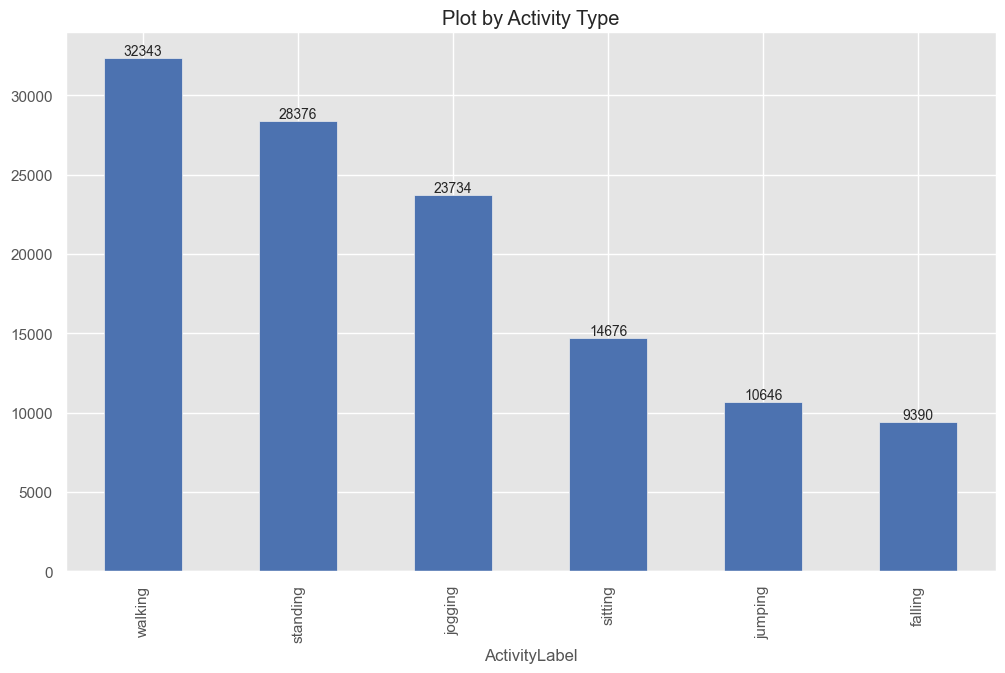

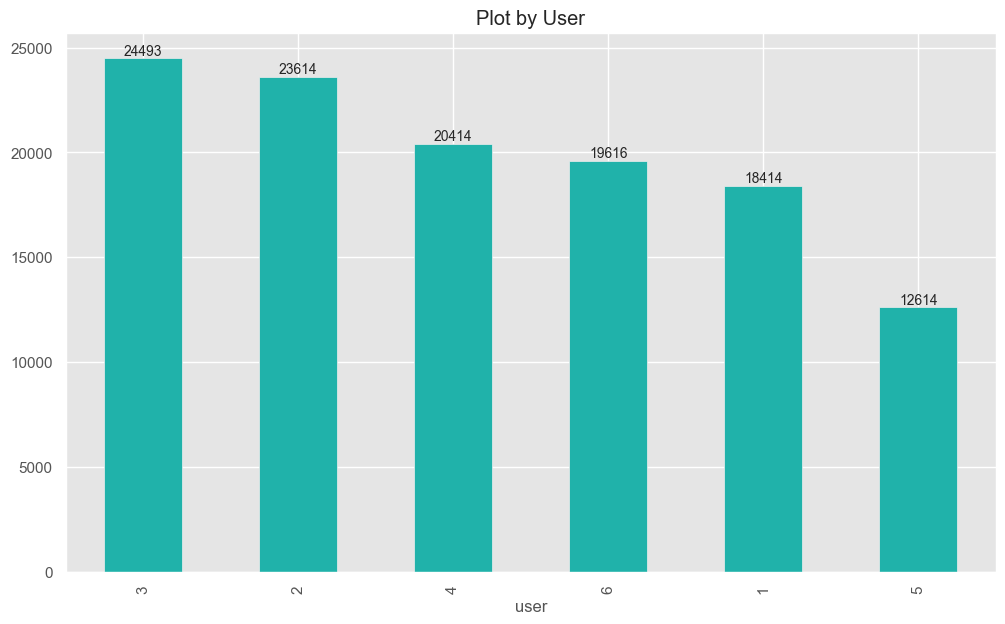

In [4]:
# Show how many training examples exist for each of the six activities
fig = plt.figure(figsize=(12,7))
activity_counts = df['ActivityLabel'].value_counts()
ax = activity_counts.plot(kind='bar', title='Plot by Activity Type', color='b')
for i, v in enumerate(activity_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Training by records (users)
fig = plt.figure(figsize=(12,7))
user_counts = df['user'].value_counts()
ax = user_counts.plot(kind='bar', title='Plot by User', color='lightseagreen')
for i, v in enumerate(user_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [5]:
summary_stats = pd.DataFrame({
    'Tổng Số Mẫu': activity_counts,
    'Trung Bình Mỗi Người': activity_counts / 6
})

summary_stats['%'] = (summary_stats['Tổng Số Mẫu'] / summary_stats['Tổng Số Mẫu'].sum() * 100).round(2)

summary_stats['Trung Bình Mỗi Người'] = summary_stats['Trung Bình Mỗi Người'].round(2)
summary_stats['%'] = summary_stats['%'].astype(str) + '%'

display(summary_stats)

Tổng Số Mẫu  Trung Bình Mỗi Người       %
ActivityLabel                                           
walking              32343               5390.50  27.14%
standing             28376               4729.33  23.81%
jogging              23734               3955.67  19.92%
sitting              14676               2446.00  12.32%
jumping              10646               1774.33   8.93%
falling               9390               1565.00   7.88%

In [6]:
df[0:-1].groupby(by = 'ActivityLabel').count()

AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ   user
ActivityLabel                                                    
falling          9390    9390    9390   9390   9390   9390   9390
jogging         23734   23734   23734  23734  23734  23734  23734
jumping         10645   10645   10645  10645  10645  10645  10645
sitting         14676   14676   14676  14676  14676  14676  14676
standing        28376   28376   28376  28376  28376  28376  28376
walking         32343   32343   32343  32343  32343  32343  32343

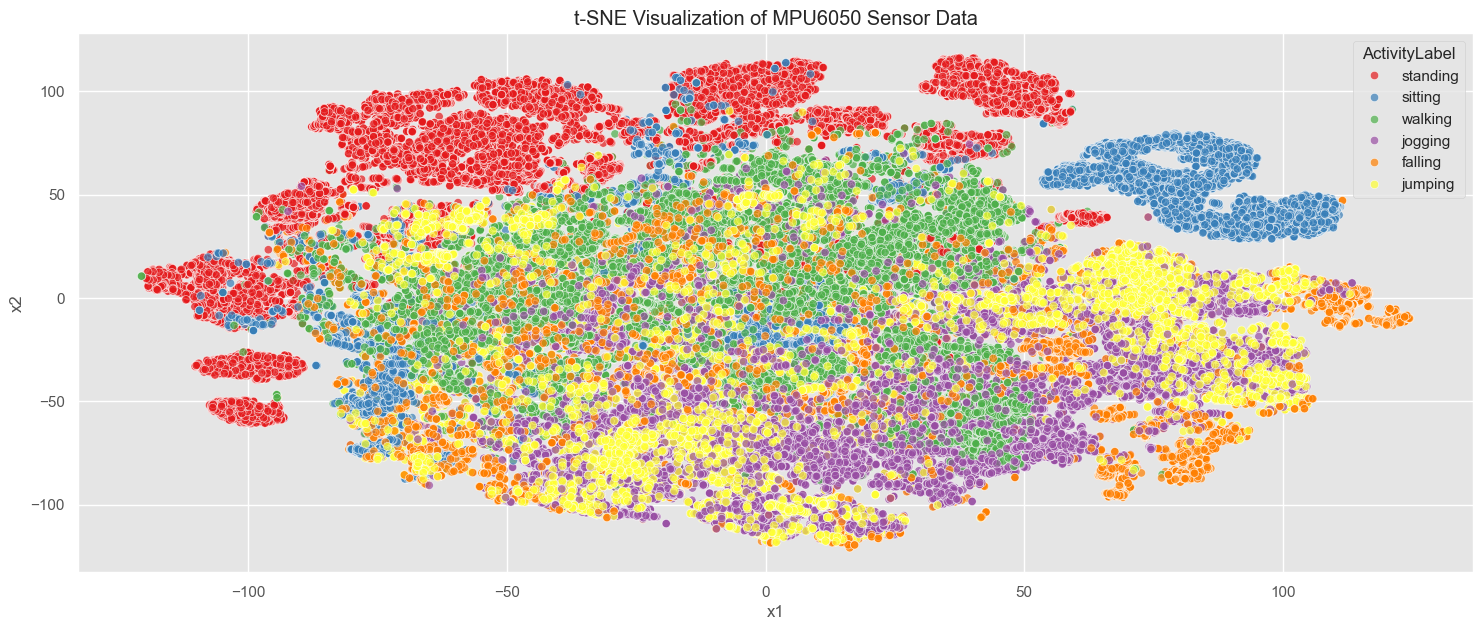

In [12]:
sensor_features = ["AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ"]
X = df[sensor_features]
y = df["ActivityLabel"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=911, perplexity=50)
X_embedded = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_embedded, columns=['x1', 'x2'])
df_tsne["ActivityLabel"] = y

plt.figure(figsize=(18, 7))
sns.scatterplot(data=df_tsne, x='x1', y='x2', hue='ActivityLabel', palette='Set1', alpha=0.7)
plt.title("t-SNE Visualization of MPU6050 Sensor Data")
plt.show()

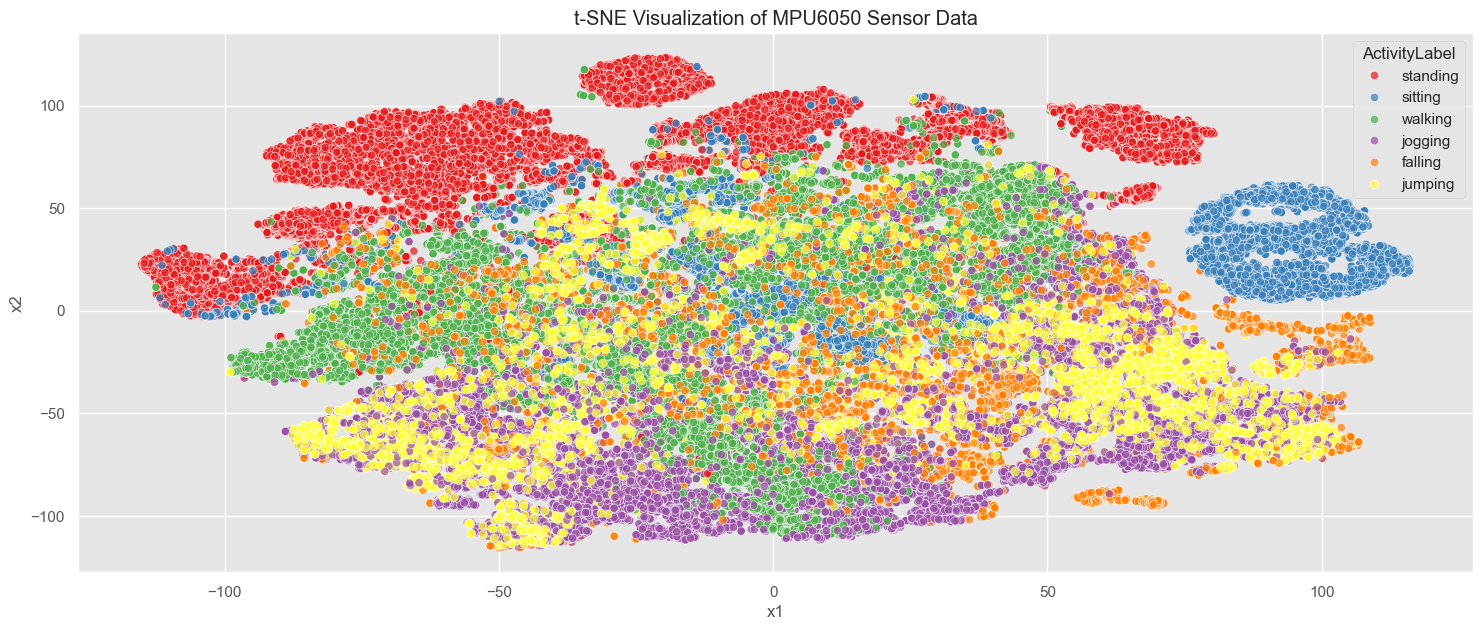

In [13]:
sensor_features = ["AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ"]
X = df[sensor_features]
y = df["ActivityLabel"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=911, perplexity=50)
X_embedded = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_embedded, columns=['x1', 'x2'])
df_tsne["ActivityLabel"] = y

plt.figure(figsize=(18, 7))
sns.scatterplot(data=df_tsne, x='x1', y='x2', hue='ActivityLabel', palette='Set1', alpha=0.7)
plt.title("t-SNE Visualization of MPU6050 Sensor Data")
plt.show()

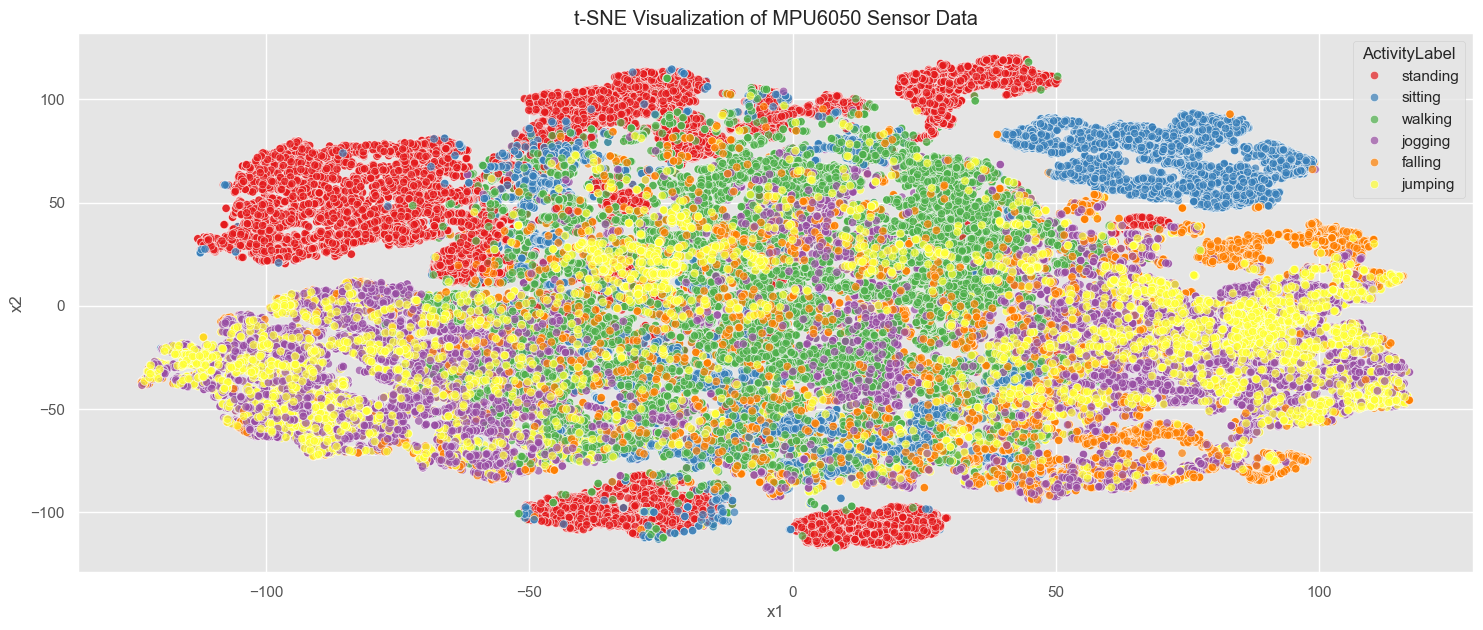

In [14]:
sensor_features = ["AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ"]
X = df[sensor_features]
y = df["ActivityLabel"]

tsne = TSNE(n_components=2, random_state=911, perplexity=50)
X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['x1', 'x2'])
df_tsne["ActivityLabel"] = y

plt.figure(figsize=(18, 7))
sns.scatterplot(data=df_tsne, x='x1', y='x2', hue='ActivityLabel', palette='Set1', alpha=0.7)
plt.title("t-SNE Visualization of MPU6050 Sensor Data")
plt.show()

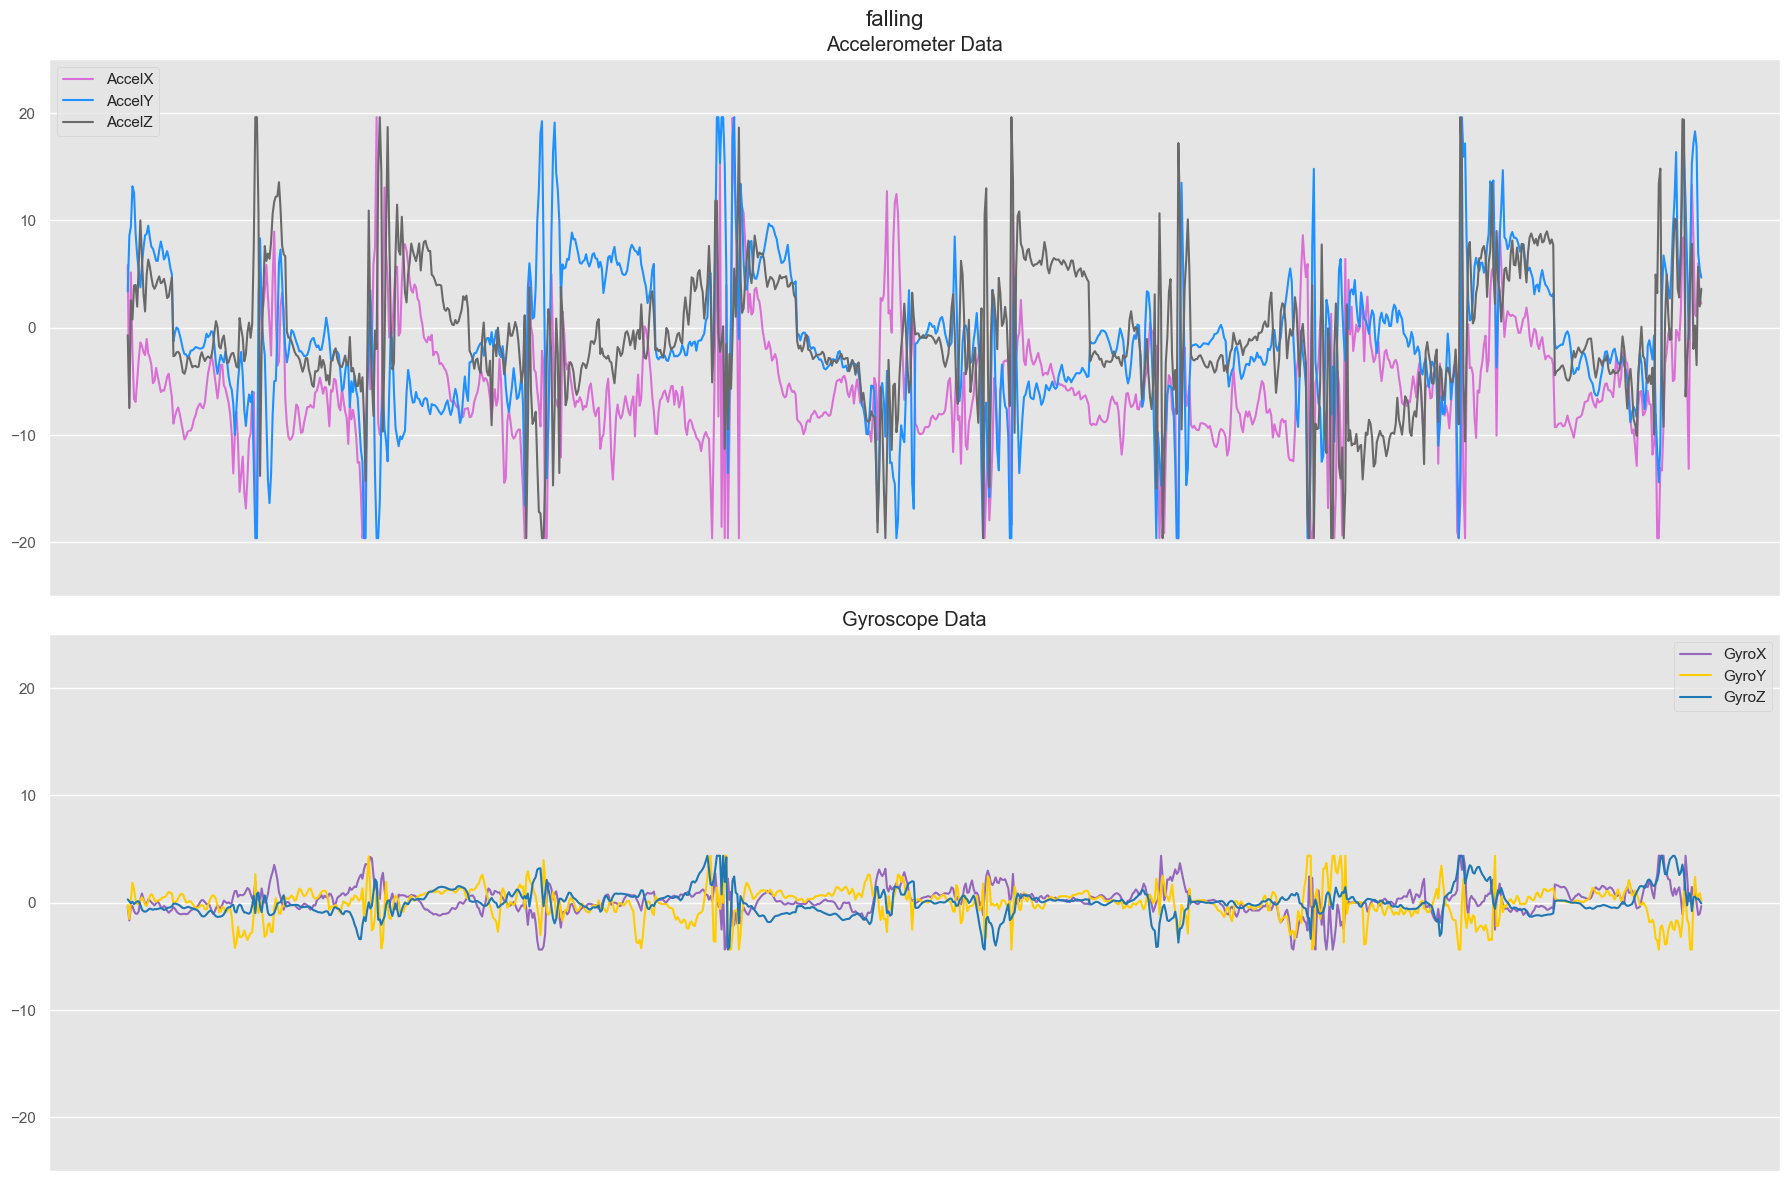

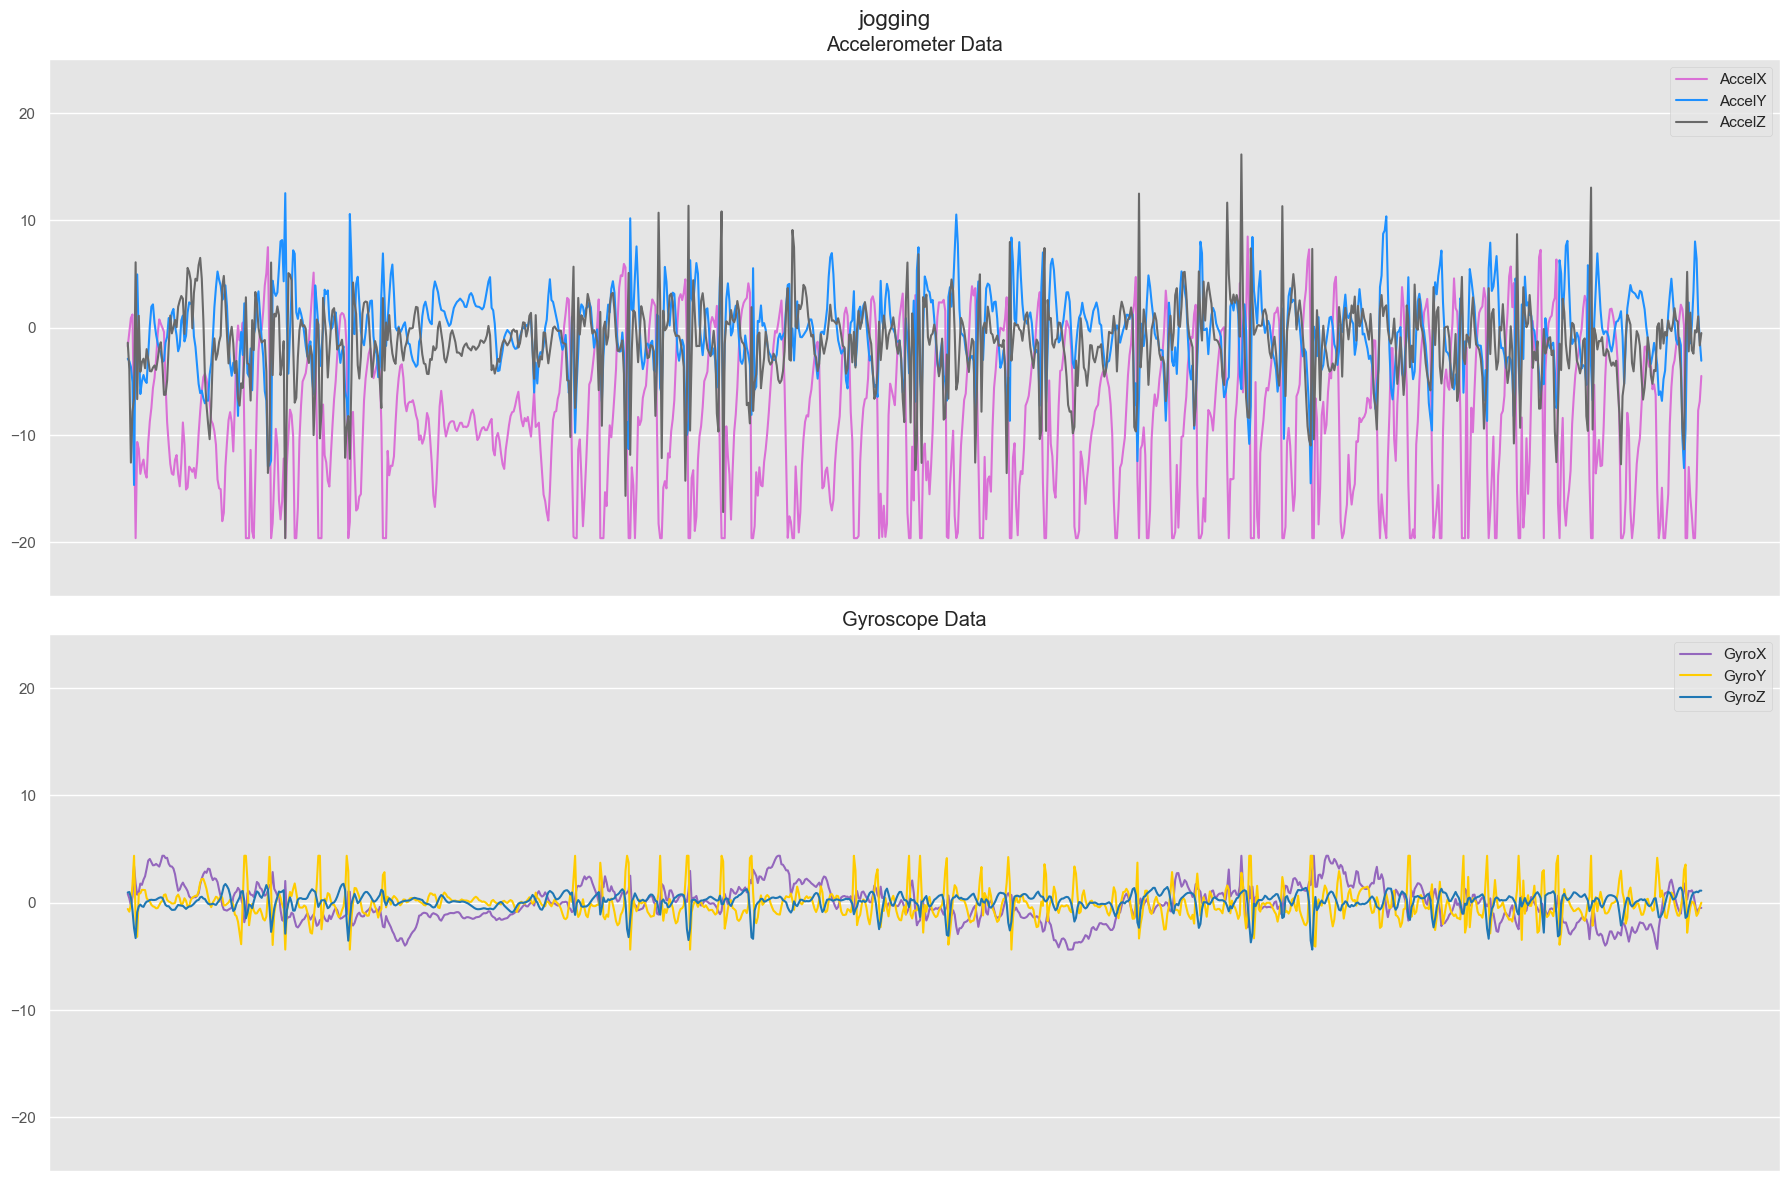

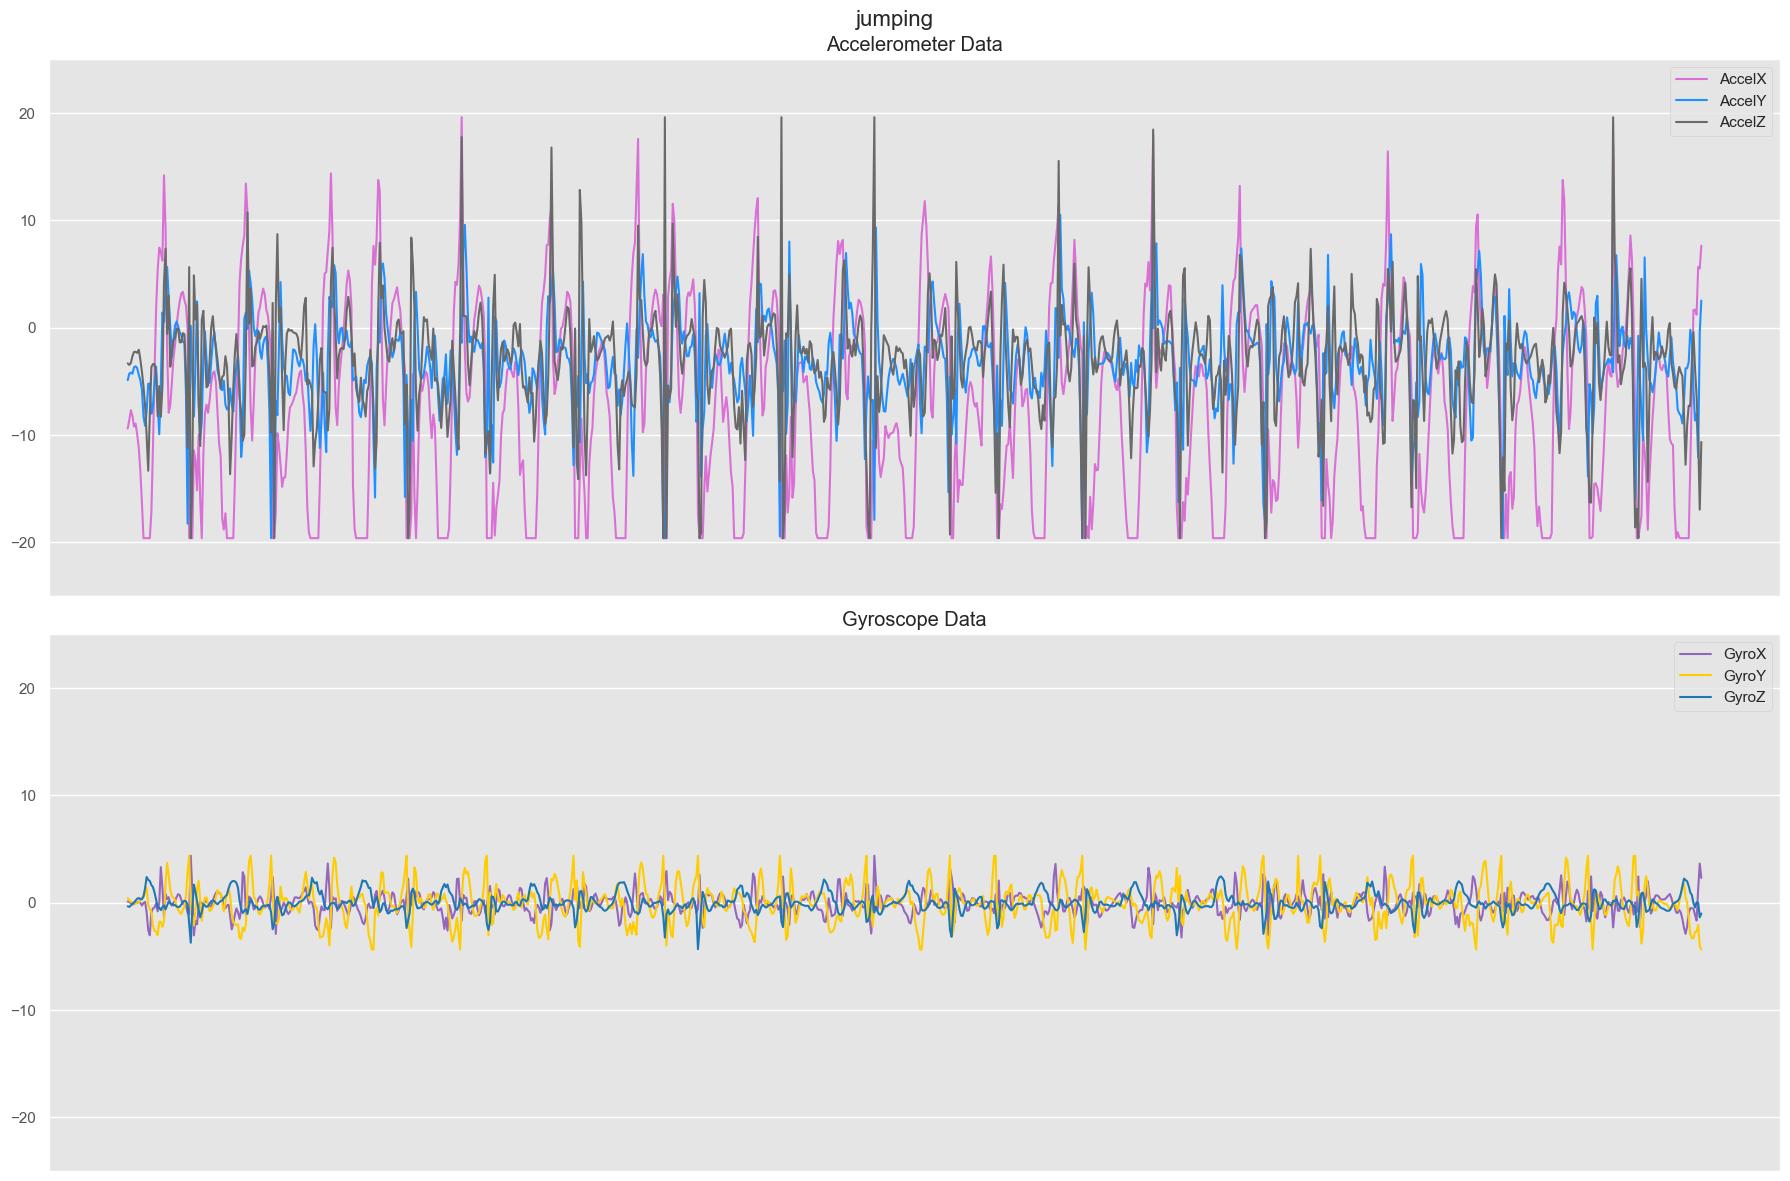

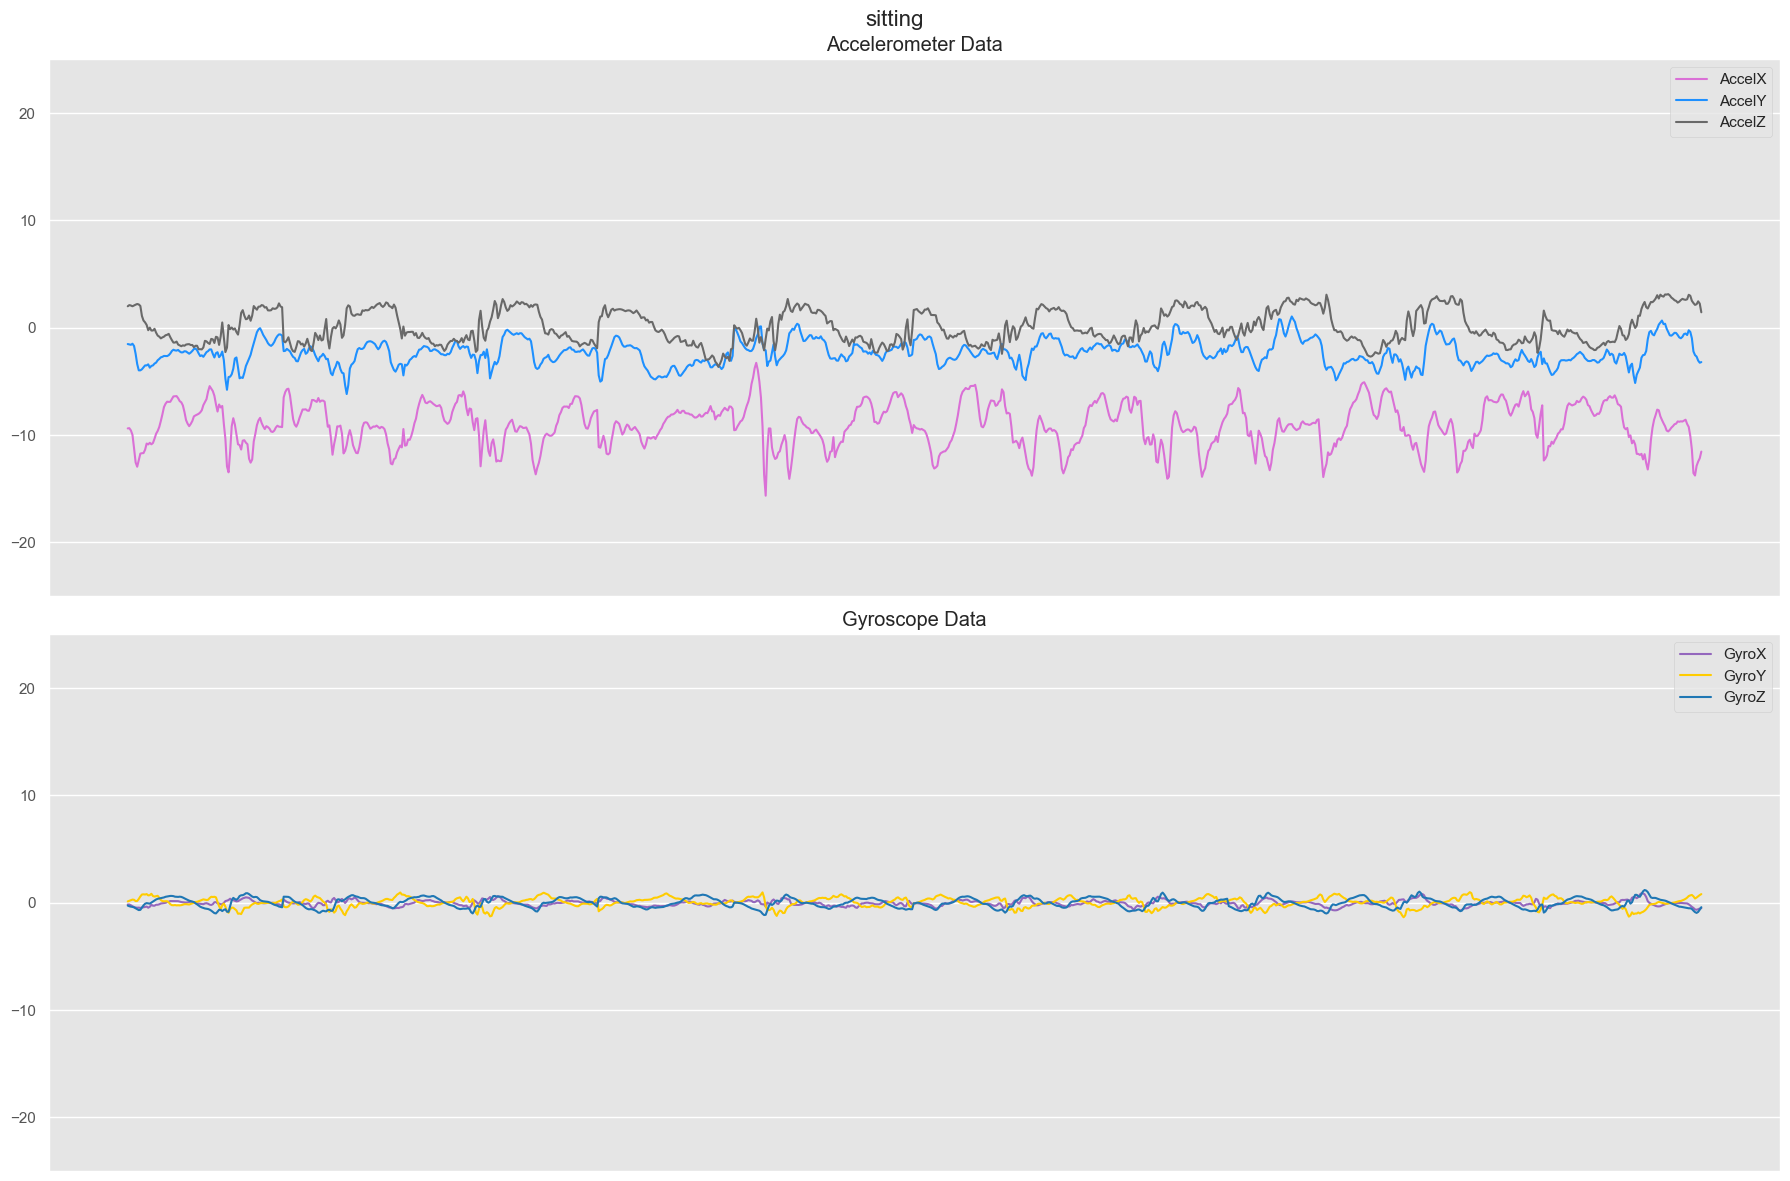

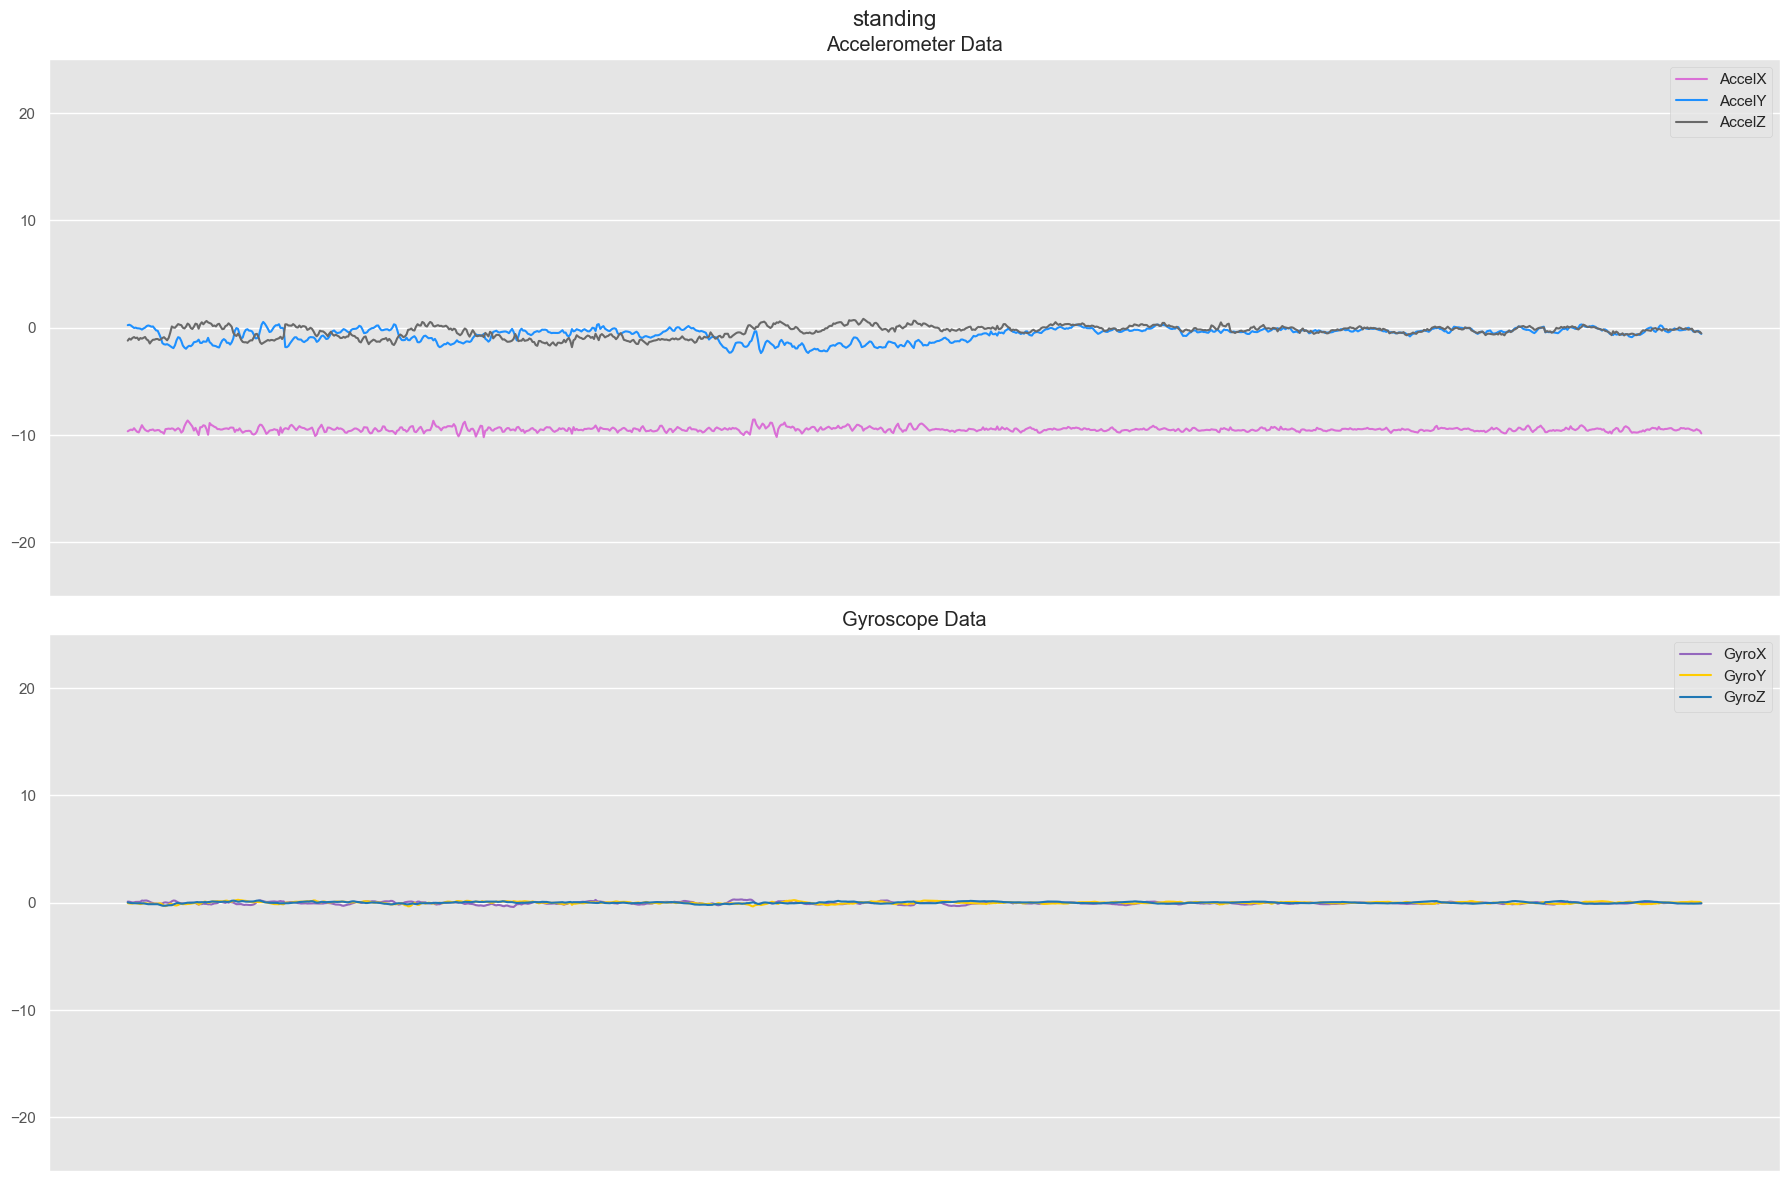

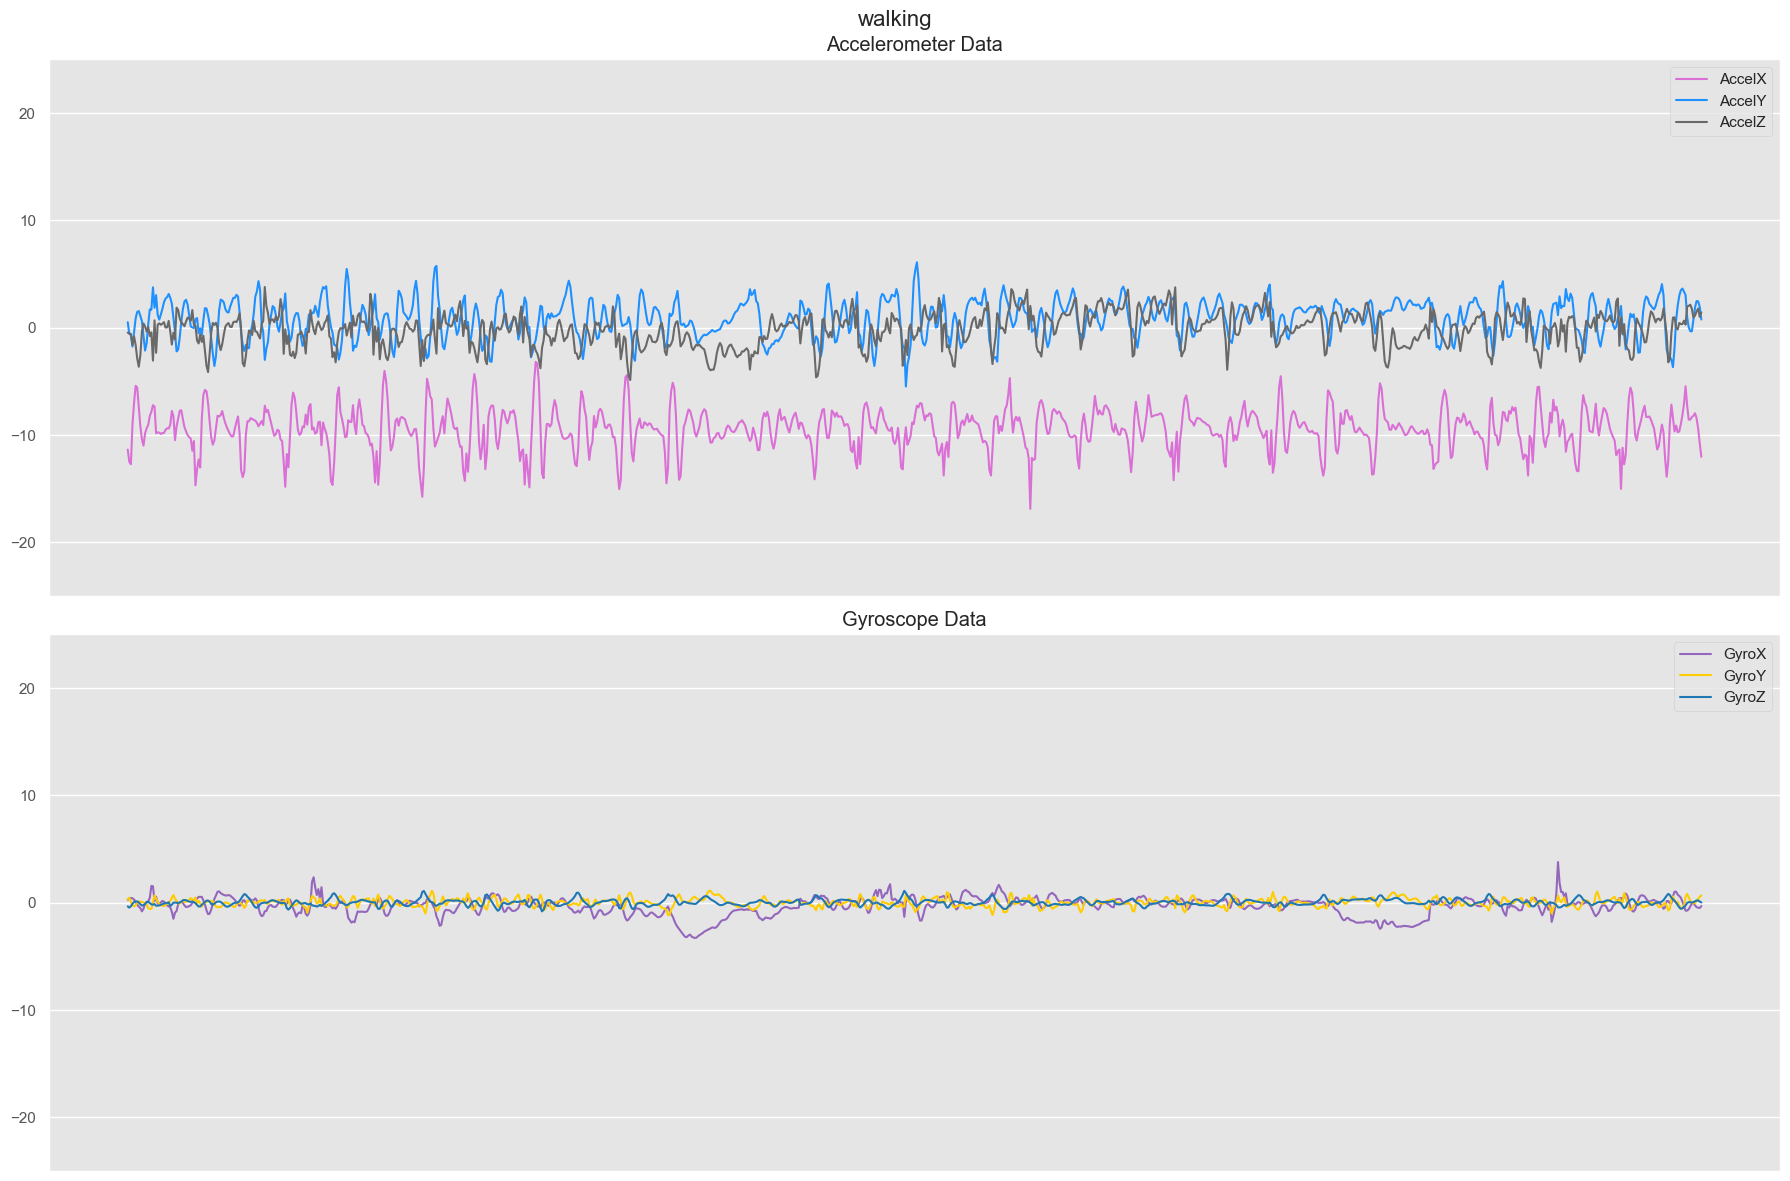

In [36]:
def plot_activity(activity, data):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))
    
    # Plot Accelerometer data
    ax1.plot(data.index, data['AccelX'], color='orchid', linewidth=1.5, label="AccelX")
    ax1.plot(data.index, data['AccelY'], color='dodgerblue', linewidth=1.5, label="AccelY")
    ax1.plot(data.index, data['AccelZ'], color='dimgrey', linewidth=1.5, label="AccelZ")
    ax1.set_title('Accelerometer Data')
    ax1.legend()
    ax1.set_ylim(-25, 25)
    ax1.grid(True)
    ax1.set_xticks([])
    
    # Plot Gyroscope data
    ax2.plot(data.index, data['GyroX'], color='#9467bd', linewidth=1.5, label="GyroX")
    ax2.plot(data.index, data['GyroY'], color='#ffcc00', linewidth=1.5, label="GyroY")
    ax2.plot(data.index, data['GyroZ'], color='#1f77b4', linewidth=1.5, label="GyroZ")
    ax2.set_title('Gyroscope Data')
    ax2.legend()
    ax2.set_ylim(-25, 25)
    ax2.grid(True)
    ax2.set_xticks([])
    
    plt.suptitle(activity, fontsize=16)
    plt.tight_layout()
    plt.show()

for activity in np.unique(df['ActivityLabel']):
    subset = df[df['ActivityLabel'] == activity][500:1500]
    subset = subset.reset_index()
    plot_activity(activity, subset)